In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
df = pd.read_csv('bike_sharing.csv')

# Understand the data
print(df.head())
print(df.info())
print(df.describe())

# Handle Categorical Variables
df['season'] = df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit'] = df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'})

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Check for Missing Values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

# Display the first few rows of the processed dataset
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Mist'],
      dtype='object')


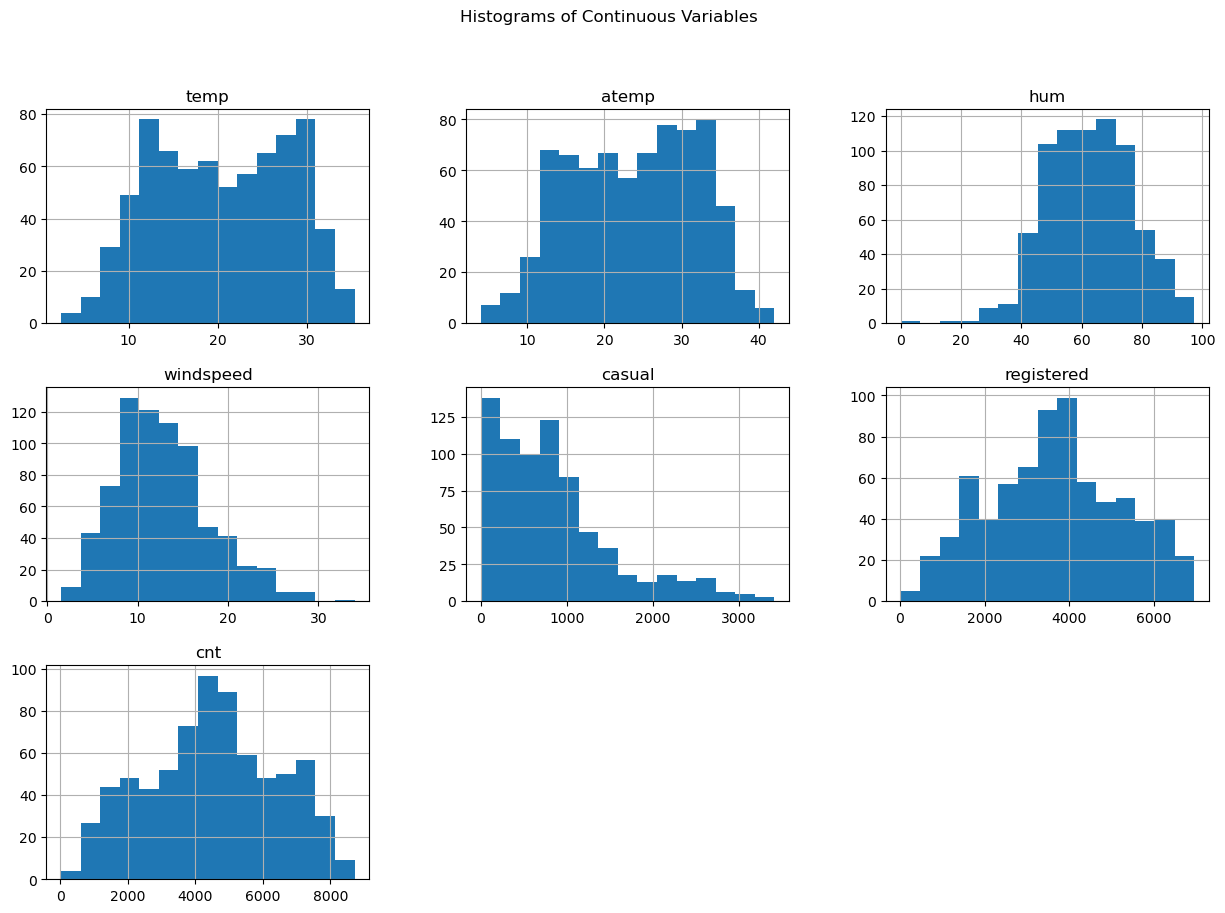

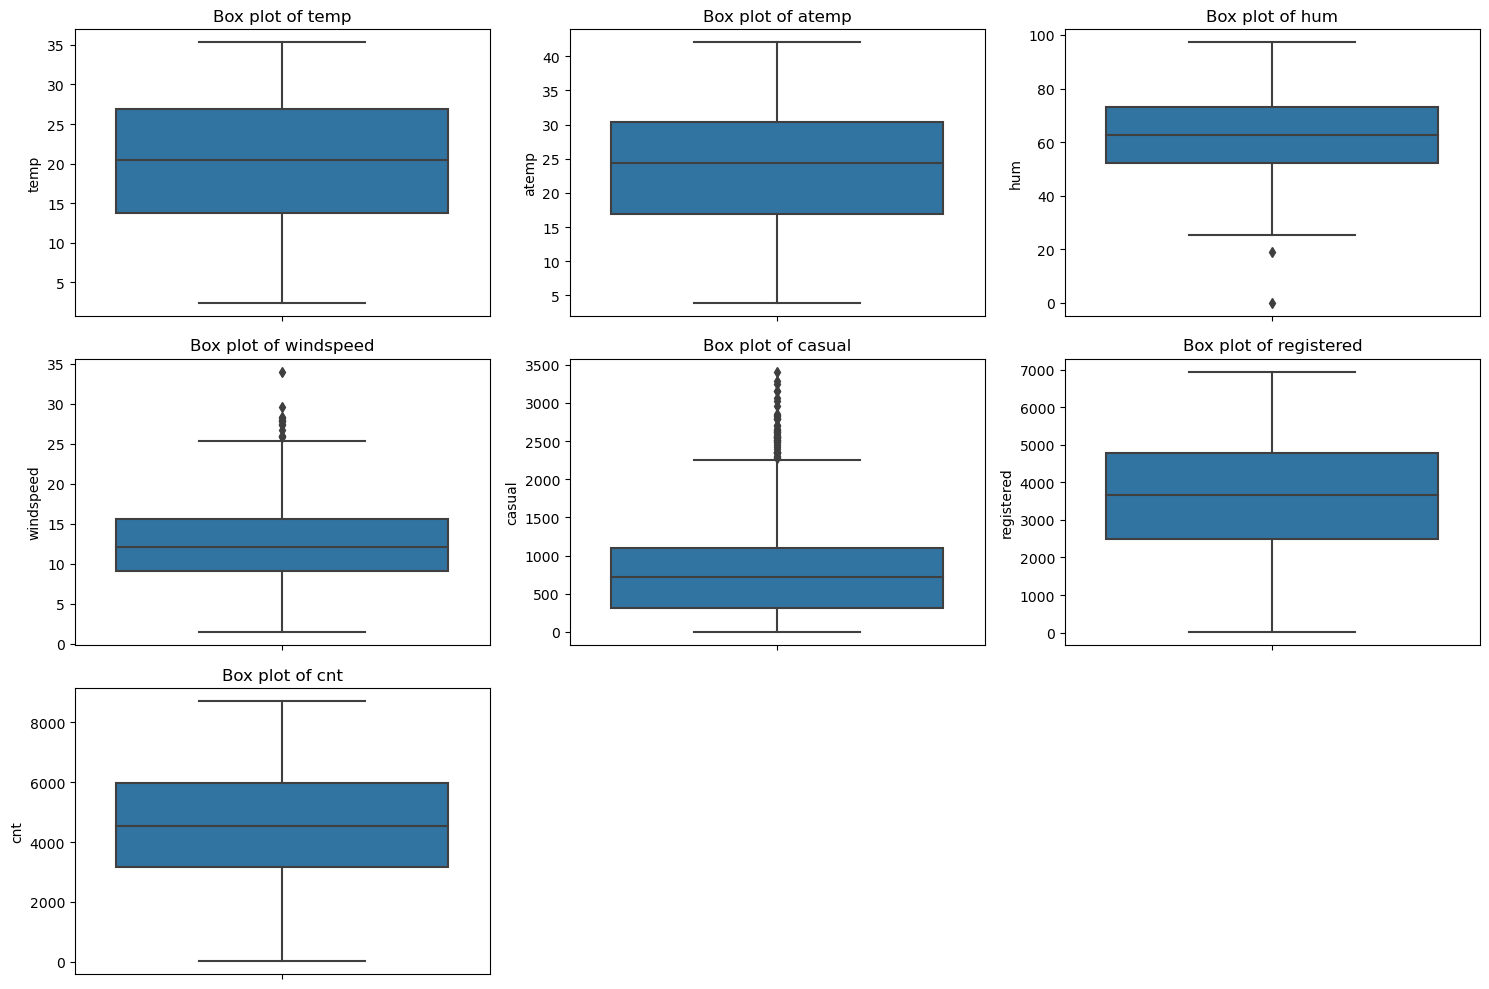

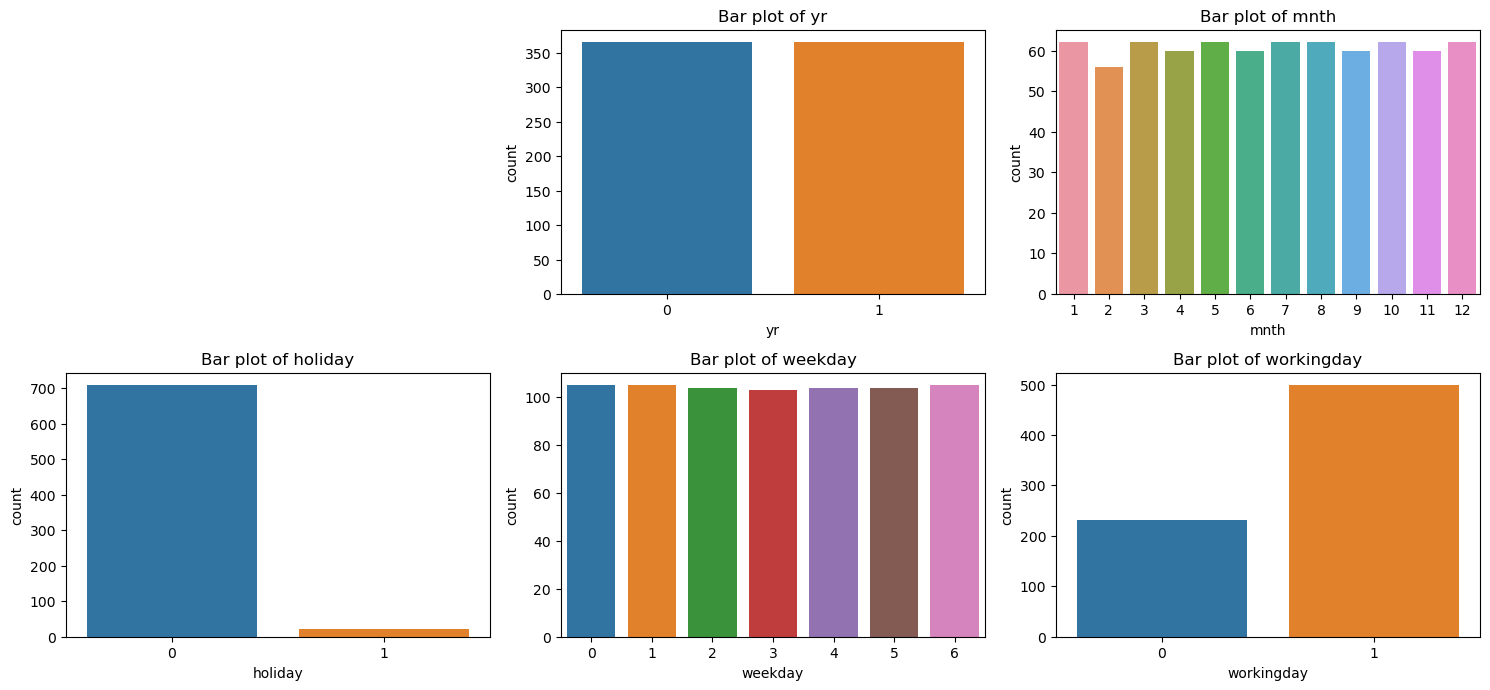

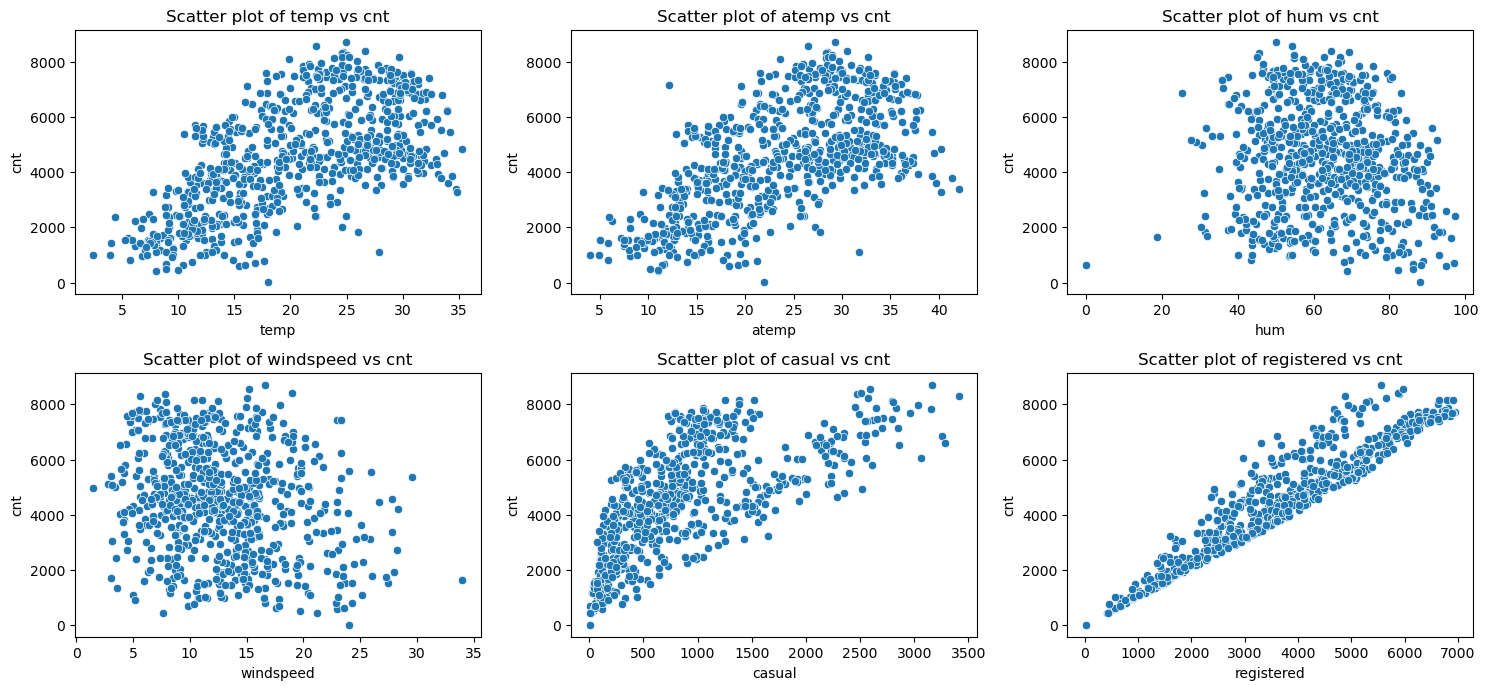

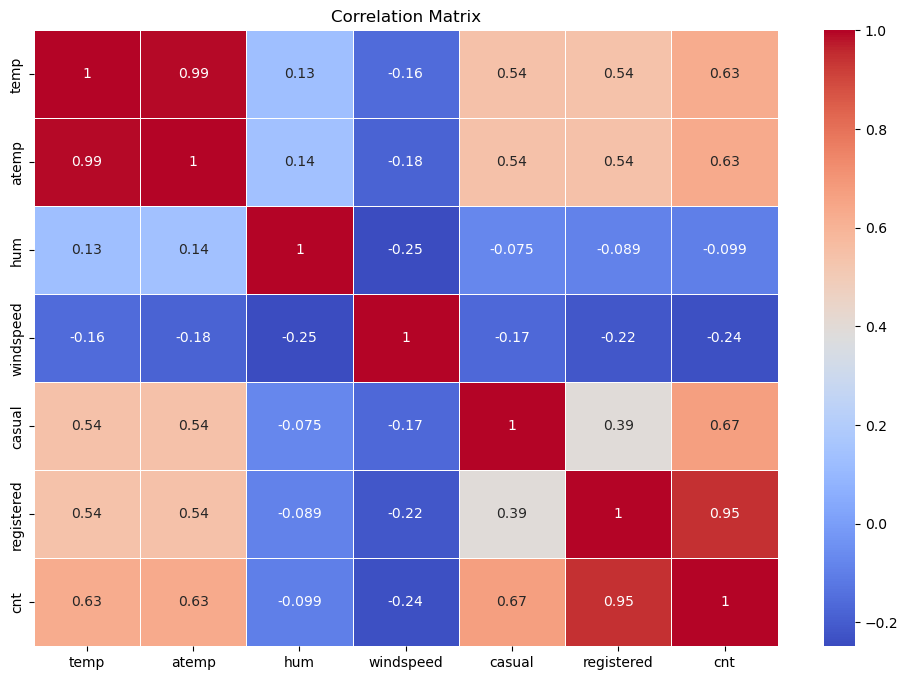

In [28]:
# Convert the date column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Check column names
print(df.columns)

# Define continuous and categorical variables
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Univariate Analysis
# Plot histograms for continuous variables
df[continuous_vars].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

# Plot box plots for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Box plot of {var}')
plt.tight_layout()
plt.show()

# Plot bar plots for categorical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    if var in df.columns:
        plt.subplot(3, 3, i+1)
        sns.countplot(x=df[var])
        plt.title(f'Bar plot of {var}')
plt.tight_layout()
plt.show()

# Bivariate Analysis
# Plot scatter plots to understand the relationship between independent variables and the target variable 'cnt'
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars[:-1]):  # Exclude 'cnt' from independent variables
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[var], y=df['cnt'])
    plt.title(f'Scatter plot of {var} vs cnt')
plt.tight_layout()
plt.show()

# Use correlation matrices to check for multicollinearity
plt.figure(figsize=(12, 8))
corr_matrix = df[continuous_vars].corr()  # Exclude non-numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:



# Convert the date column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Define the features and target variable
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
target = 'cnt'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Selection using Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lasso.coef_})
print(coefficients)

Mean Squared Error: 2.8526399891811606e-24
R-squared: 1.0
      Feature  Coefficient
0        temp     0.000000
1       atemp     0.000000
2         hum    -0.000000
3   windspeed    -0.000000
4      casual   683.818019
5  registered  1578.878108


Mean Squared Error: 2.8526399891811606e-24
R-squared: 1.0


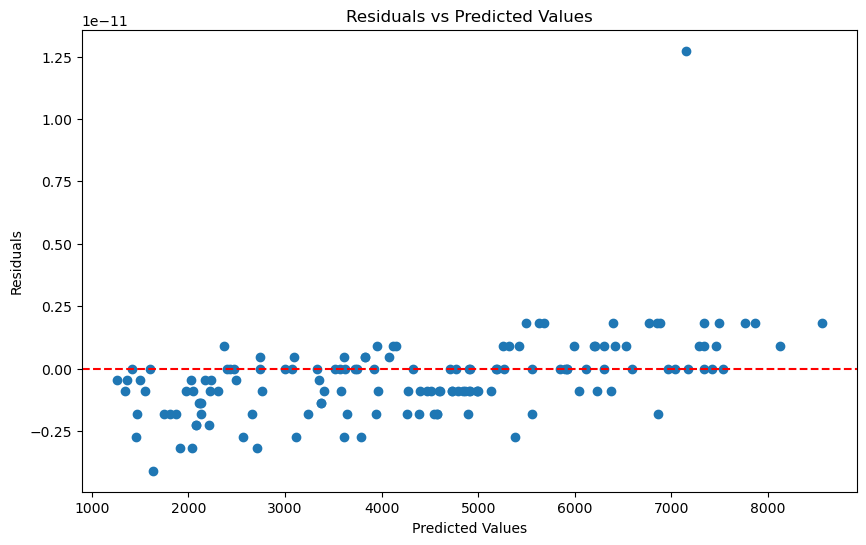

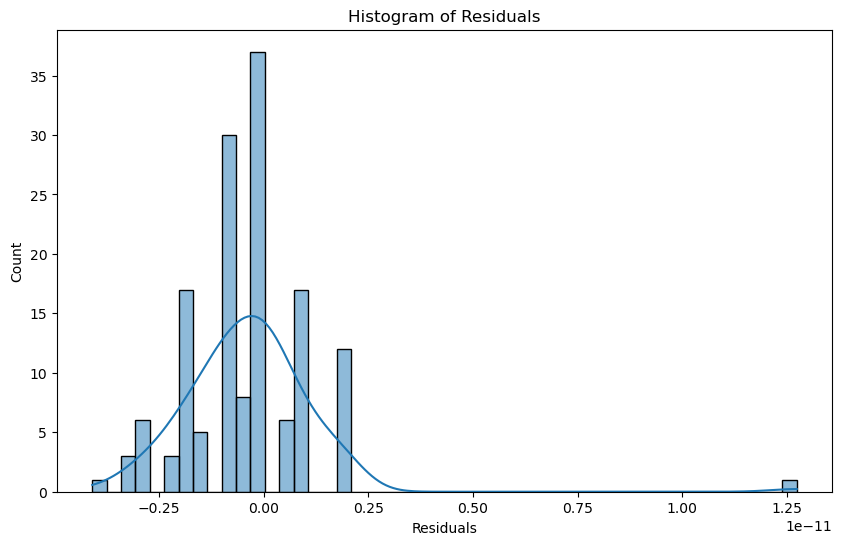

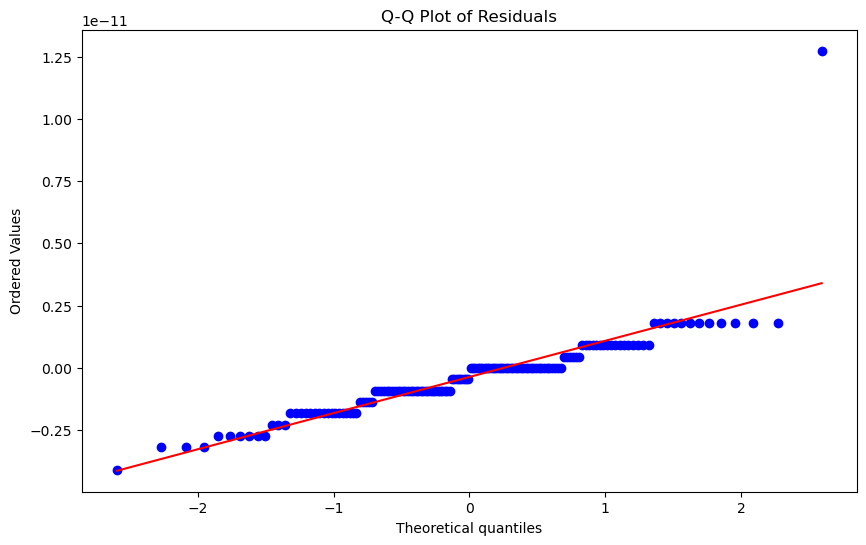

In [30]:




# Convert the date column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# Define the features and target variable
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
target = 'cnt'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals to check for any patterns
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Plot Q-Q plot to check for normality
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()